In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sp500 = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/SP500.csv")

Convert Date column to pandas datetime object, trim data to Jan 1 2022 and onward, and make chronological

In [2]:
sp500['DateTime'] = pd.to_datetime(sp500['Date'])
sp500['DateTime'] = np.where(sp500['DateTime'].dt.year > 2022, sp500['DateTime'] - pd.offsets.DateOffset(years=100), sp500['DateTime'])
# Anything after 2022 is changed to have 100 years subtracted because 2022 is the current year, change it as the years progress
sp500 = sp500.loc[(sp500['DateTime']>='2021-01-01')&(sp500['DateTime']<='2021-12-31')]
sp500 = sp500.loc[::-1].reset_index(drop=True)

sp500_close = np.log(sp500['Adj Close**'])

dates = sp500['DateTime']



Pull in other data sets, do same transformation

In [3]:
unemp = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/UNRATE.csv")
ten_year_rate = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/DGS10.csv")
rec_exp = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/Rec-Exp.csv")
cpi = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/CPIAUCSL.csv")
vix = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/VIX_History.csv")

unemp['DateTime'] = pd.to_datetime(unemp['DATE'])
ten_year_rate['DateTime'] = pd.to_datetime(ten_year_rate['DATE'])
rec_exp['DateTime'] = pd.to_datetime(rec_exp['DATE'])
cpi['DateTime'] = pd.to_datetime(cpi['DATE'])
vix['DateTime'] = pd.to_datetime(vix['DATE'])



Left merge with dates object above

In [4]:
unemp = pd.merge(dates.astype("datetime64[M]"),unemp,how='left',on = 'DateTime')
unemp = unemp['UNRATE']

cpi = pd.merge(dates.astype("datetime64[M]"),cpi,how='left',on = 'DateTime')
cpi = cpi['CPIAUCSL']

rec_exp = pd.merge(dates.astype("datetime64[M]"),rec_exp,how='left',on = 'DateTime')
rec_exp = rec_exp['USREC']

ten_year_rate = pd.merge(dates,ten_year_rate,how='left',on='DateTime')
ten_year_rate = ten_year_rate['ten_year']

vix = pd.merge(dates,vix,how='left',on='DateTime')
vix = vix['CLOSE']



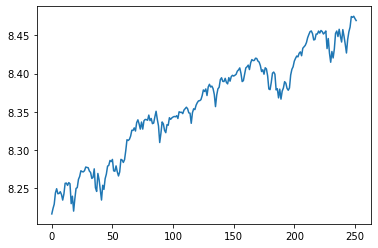

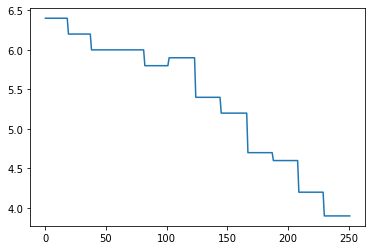

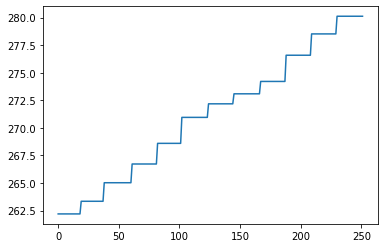

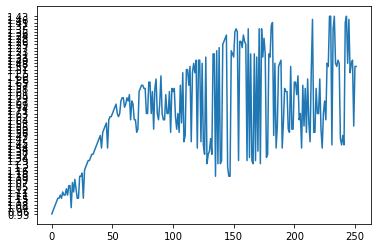

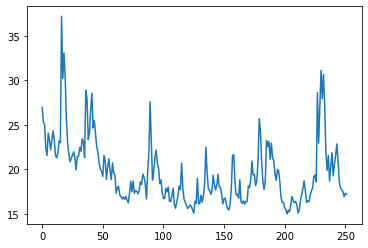

In [5]:
plt.plot(sp500_close)
plt.show()

plt.plot(unemp)
plt.show()

plt.plot(cpi)
plt.show()

plt.plot(ten_year_rate)
plt.show()

plt.plot(vix)
plt.show()

[0.00089974]


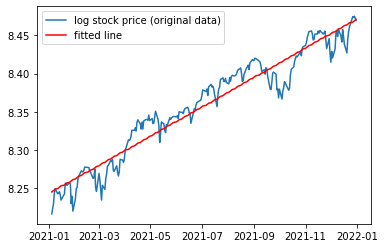

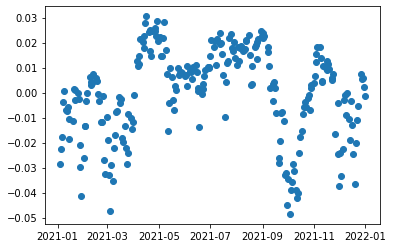

In [6]:
from sklearn import linear_model
clf_sp500 = linear_model.LinearRegression()
index = dates.reset_index().index.values.reshape(-1,1)

clf_sp500.fit(index, sp500_close)
print(clf_sp500.coef_) # To print the coefficient estimate of the series. 
linear_prediction_sp500 = clf_sp500.predict(index)
plt.plot(sp500['DateTime'], sp500_close, label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction_sp500, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals_sp500 = sp500_close - linear_prediction_sp500
plt.plot(sp500['DateTime'], linear_residuals_sp500, 'o')
plt.show();

[-0.01058154]


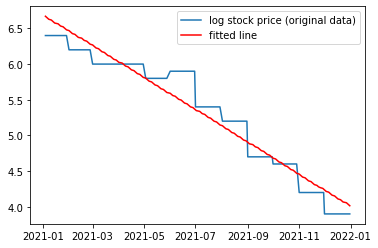

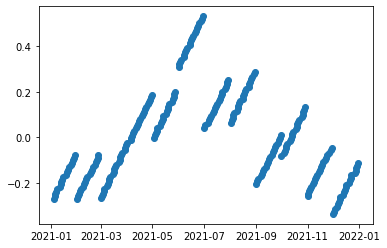

In [7]:
clf_unemp = linear_model.LinearRegression()
index = dates.reset_index().index.values.reshape(-1,1)

clf_unemp.fit(index, unemp)
print(clf_unemp.coef_) # To print the coefficient estimate of the series. 
linear_prediction_unemp = clf_unemp.predict(index)
plt.plot(sp500['DateTime'], unemp, label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction_unemp, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals_unemp = unemp - linear_prediction_unemp
plt.plot(sp500['DateTime'], linear_residuals_unemp, 'o')
plt.show();

[0.07659368]


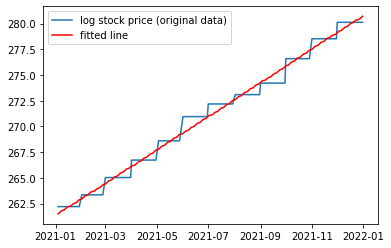

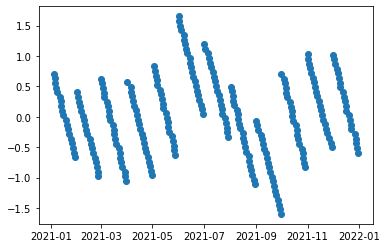

In [8]:
clf_cpi = linear_model.LinearRegression()
index = dates.reset_index().index.values.reshape(-1,1)

clf_cpi.fit(index, cpi)
print(clf_cpi.coef_) # To print the coefficient estimate of the series. 
linear_prediction_cpi = clf_cpi.predict(index)
plt.plot(sp500['DateTime'], cpi, label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction_cpi, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals_cpi = cpi - linear_prediction_cpi
plt.plot(sp500['DateTime'], linear_residuals_cpi, 'o')
plt.show();

[-0.01595636]


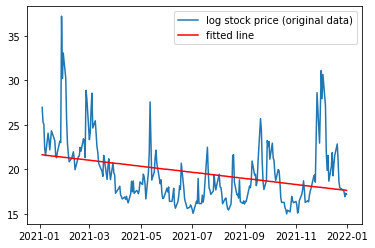

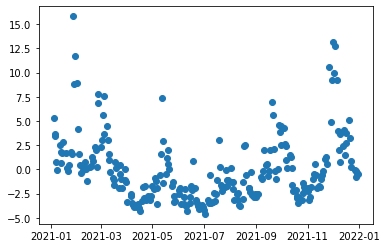

In [9]:
clf_vix = linear_model.LinearRegression()
index = dates.reset_index().index.values.reshape(-1,1)

clf_vix.fit(index, vix)
print(clf_vix.coef_) # To print the coefficient estimate of the series. 
linear_prediction_vix = clf_vix.predict(index)
plt.plot(sp500['DateTime'], vix, label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction_vix, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals_vix = vix - linear_prediction_vix
plt.plot(sp500['DateTime'], linear_residuals_vix, 'o')
plt.show();

Create vector dataframe

In [10]:
varma_data = pd.concat([linear_residuals_sp500,
                        linear_residuals_unemp,
                        linear_residuals_cpi,
                        linear_residuals_vix,
                        ten_year_rate],axis=1)
varma_data.rename(columns={'Adj Close**': 'sp500', 'UNRATE': 'unemp',\
                           'CPIAUCSL': 'cpi',  'CLOSE': 'vix'}, inplace=True)

print(varma_data.head())

      sp500     unemp       cpi       vix ten_year
0 -0.028698 -0.270444  0.710035  5.311326     0.93
1 -0.022540 -0.259862  0.633441  3.697282     0.96
2 -0.017746 -0.249280  0.556848  3.443238     1.04
3 -0.003908 -0.238699  0.480254  0.759195     1.08
4  0.000669 -0.228117  0.403660 -0.034849     1.13


In [11]:
from statsmodels.tsa.api import VAR
varma_array = np.asarray(varma_data,dtype = float)
days_to_predict = 60
varma_model = VAR(varma_array[0:-days_to_predict])


In [12]:
order = 5
results = varma_model.fit(order)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Dec, 2022
Time:                     14:51:10
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -21.2936
Nobs:                     187.000    HQIC:                  -22.6297
Log likelihood:           1004.27    FPE:                6.03543e-11
AIC:                     -23.5399    Det(Omega_mle):     3.14788e-11
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.003779         0.005609           -0.674           0.501
L1.y1         0.852790         0.146069            5.838           0.000
L1.y2        -0.003139         0.011951           -0.263           0.793
L1.y3        -0.000998

In [13]:
month_forecast = results.forecast(varma_array[-order:],days_to_predict)

In [14]:
train_and_predict = np.concatenate((linear_residuals_sp500.to_numpy()[0:-days_to_predict],month_forecast[:,0]),axis=0)
print(train_and_predict.shape)

(252,)


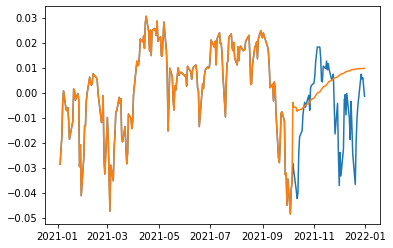

In [15]:
plt.plot(sp500['DateTime'],linear_residuals_sp500)
plt.plot(sp500['DateTime'],train_and_predict)

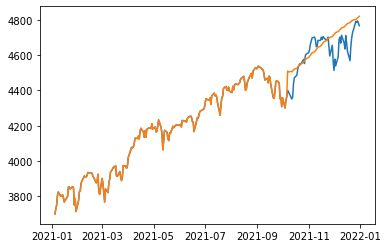

In [16]:
price_predict = np.exp(linear_prediction_sp500+train_and_predict)
plt.plot(sp500['DateTime'],sp500['Adj Close**'])
plt.plot(sp500['DateTime'],price_predict)